In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [103]:
bank_data = pd.read_csv('../../dataset/BankChurners.csv')
bank_data = bank_data[bank_data.columns[:-2]]
bank_data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [18]:
# data description
print('this shape of dataset is ', bank_data.shape)
print('****-----------data information---------------****')
print(bank_data.info())       # there is empty cell

# exploringunique value
print('****-----------exploring unique value---------------****')
for col in bank_data.columns:
    print(col)
    print(bank_data[col].unique())
    print('**************-----line------****************')
    
# check which the columns is repetitive, before we delete it
print(len(bank_data['CLIENTNUM'].unique()) == len(bank_data['CLIENTNUM']))
print(sorted(bank_data['CLIENTNUM'].unique()) == sorted(bank_data['CLIENTNUM']))
bank_data = bank_data.drop(['CLIENTNUM'], axis=1)
bank_data.head()

this shape of dataset is  (10127, 21)
****-----------data information---------------****
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     1

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [62]:
categories_feature = []
numeric_feature = []

# categories_feature
for col in bank_data.columns:
    if bank_data[col].dtype == 'object':
        categories_feature.append(col)    
print('category features:\n', categories_feature)
print('**************-----line------****************')

# count value number of object features
for col in categories_feature:
    print('this col of {} value number is \n{}'.format(col, bank_data[col].value_counts()))
print('**************-----line------****************')
    
# numeric feature
for col in bank_data.columns:
    if bank_data[col].dtype != 'object':
        numeric_feature.append(col)
print('numeric features:\nthe number is {}, \n{}'.format(len(numeric_feature), numeric_feature))

category features:
 ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
**************-----line------****************
this col of Attrition_Flag value number is 
Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
this col of Gender value number is 
F    5358
M    4769
Name: Gender, dtype: int64
this col of Education_Level value number is 
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
this col of Marital_Status value number is 
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64
this col of Income_Category value number is 
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64
this col of Card_

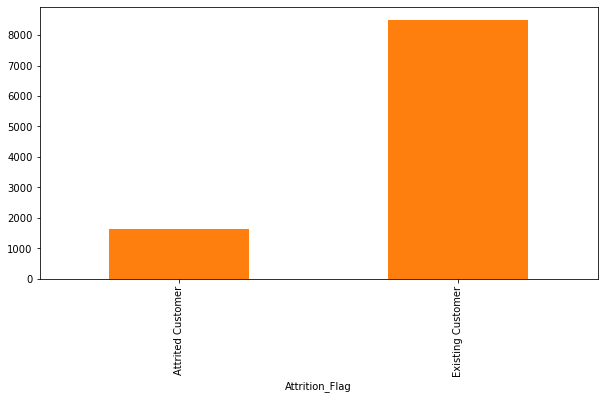

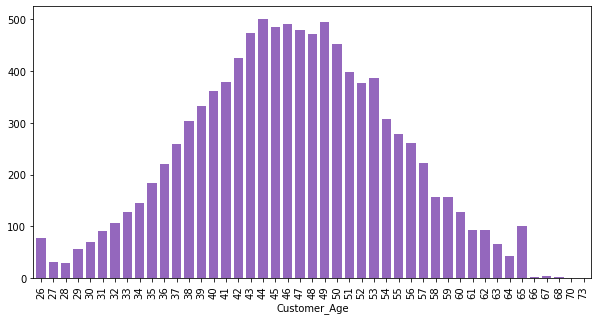

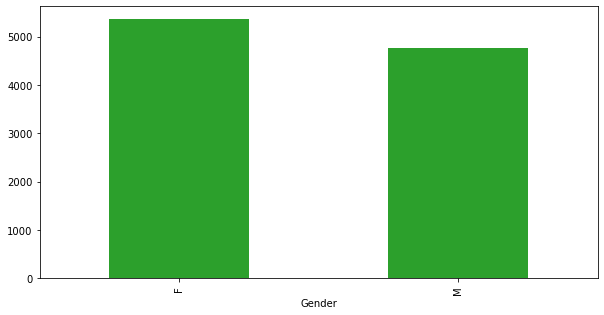

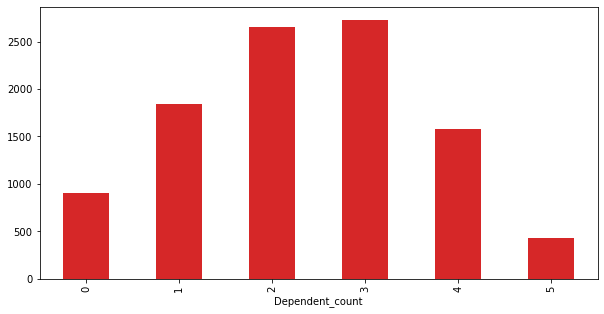

In [39]:
# Attrition_Flag
plt.figure(figsize=(10, 5))
bank_data.groupby(['Attrition_Flag'])['Attrition_Flag'].count().plot.bar(color='C1')

# customer_age
plt.figure(figsize=(10, 5))
data_age = bank_data.groupby(['Customer_Age'])['Customer_Age'].count()
data_age.plot.bar(width=0.75, color='C4')    # the age is normally distributed

# gender
plt.figure(figsize=(10, 5))
bank_data.groupby(['Gender'])['Gender'].count().plot.bar(color='C2')

# department
plt.figure(figsize=(10, 5))
bank_data.groupby(['Dependent_count'])['Dependent_count'].count().plot.bar(color='C3')

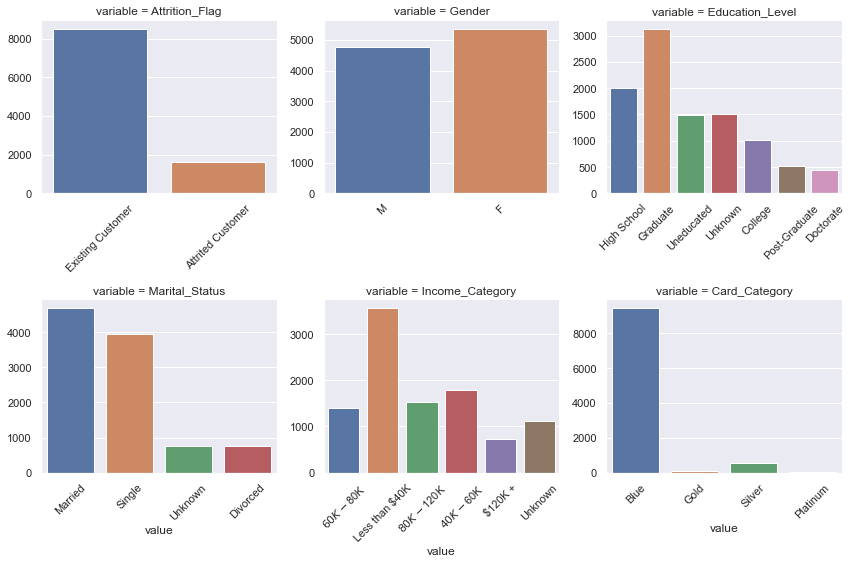

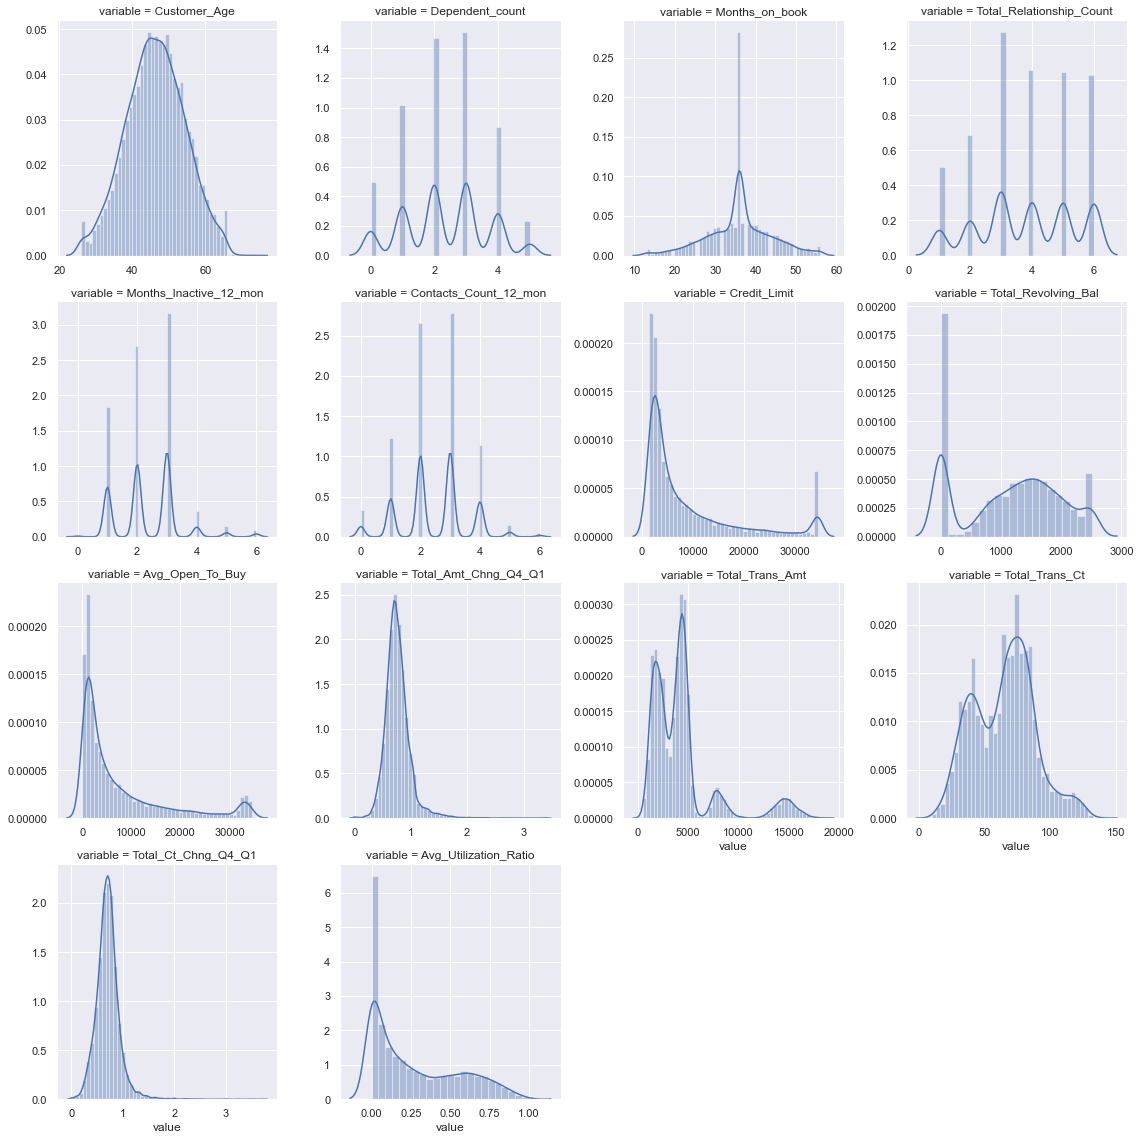

In [67]:
# statis the number of categories about category feature
def count_plot(x, **kwargs):
    sns.countplot(x=x)
    x = plt.xticks(rotation=45)
    
cat_feat = pd.melt(bank_data, value_vars=categories_feature)
cat_fig = sns.FacetGrid(cat_feat, col='variable', col_wrap=3, sharex=False, sharey=False, size=4)
cat_fig = cat_fig.map(count_plot, 'value')

# normally distributed of numeric feature
num_feat = pd.melt(bank_data, value_vars=numeric_feature)
num_fig = sns.FacetGrid(num_feat, col='variable', col_wrap=4, sharex=False, sharey=False, size=4)
num_fig = num_fig.map(sns.distplot, 'value')

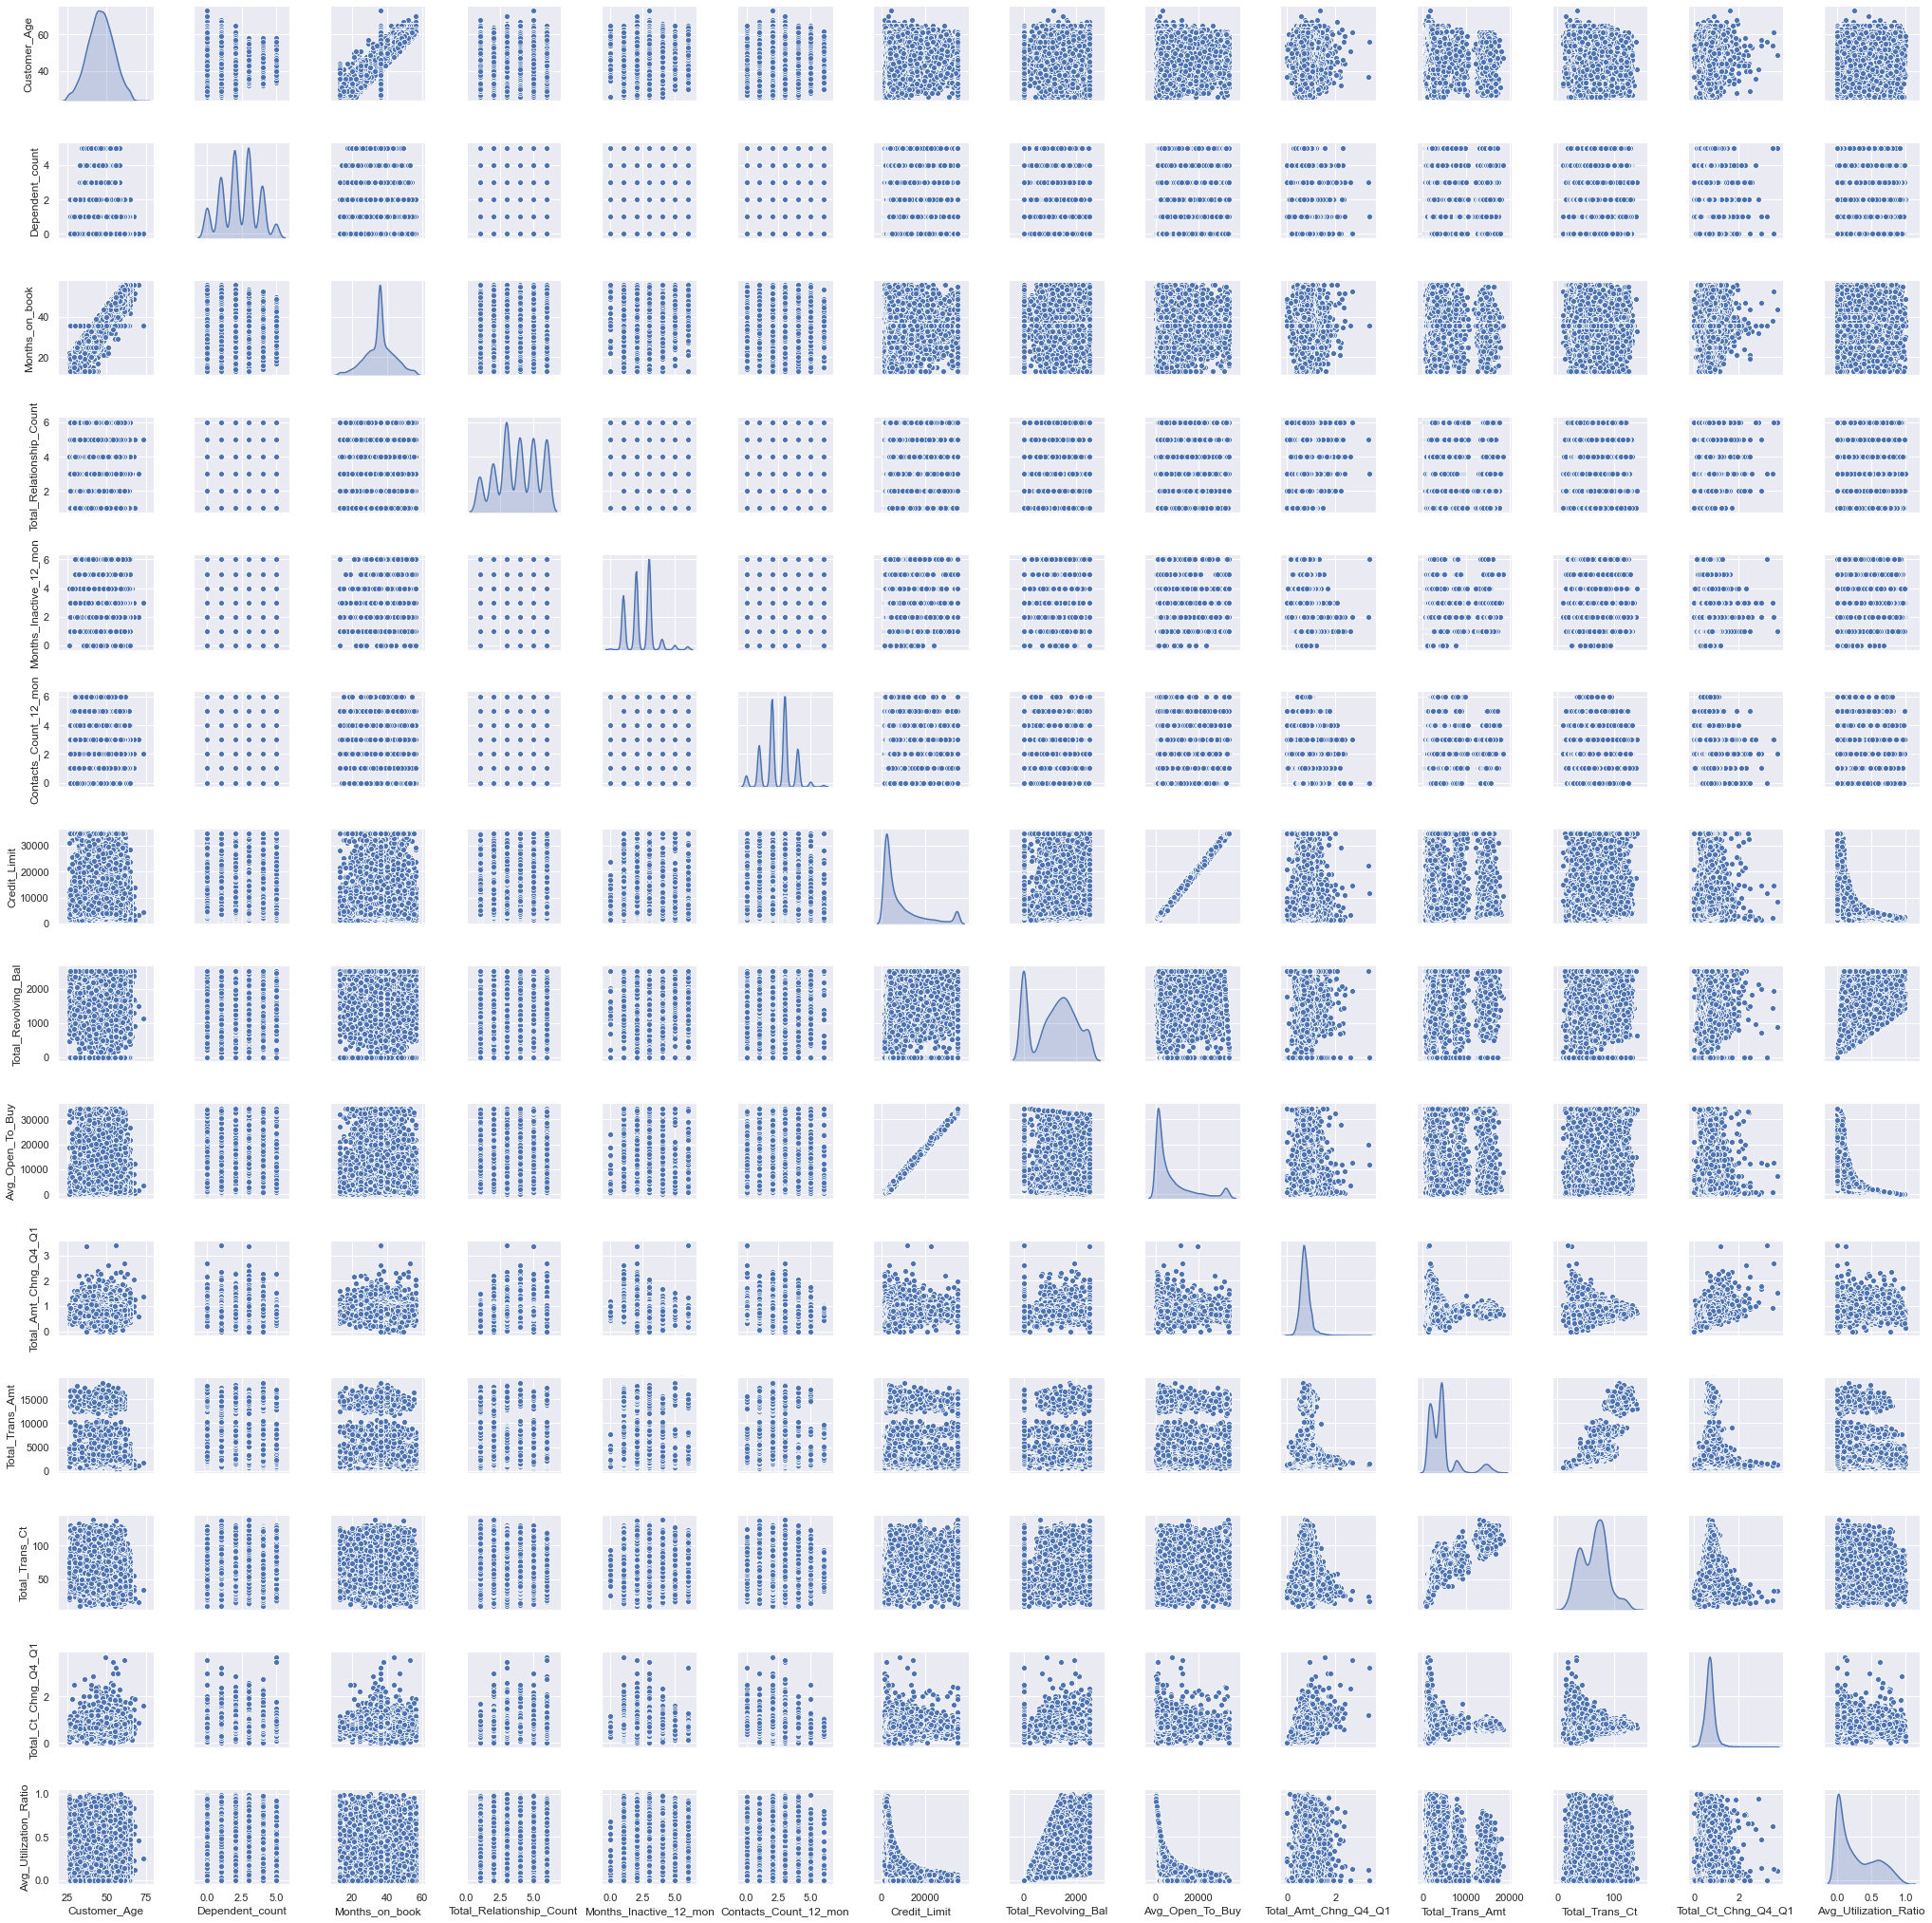

In [65]:
# visualize the relationship between numerical features
sns.set()
sns.pairplot(bank_data[numeric_feature], size=2, kind='scatter', diag_kind='kde')
plt.show()

In [104]:
# transform object values to numeric values
bank_data['Attrition_Flag'].replace({'Existing Customer': 0, 'Attrited Customer': 1}, inplace=True)
bank_data['Gender'].replace({'M':1, 'F':0}, inplace=True)
bank_data['Education_Level'].replace({'Unknown':0, 'Uneducated':1, 'High School':2, 'College':3, 
                                                                        'Graduate':4, 'Post-Graduate':5, 'Doctorate':6}, inplace=True)
bank_data['Marital_Status'].replace({'Unknown':0, 'Divorced':1, 'Married':2, 'Single':3}, inplace=True)
bank_data['Income_Category'].replace({'Unknown':0, 'Less than $40K':1, '$40K - $60K':2, '$60K - $80K':3,
                                                                       '$80K - $120K':4, '$120K +':5}, inplace=True)
bank_data['Card_Category'].replace({'Blue':0, 'Silver':1, 'Gold':2, 'Platinum':3}, inplace=True)

bank_data.head()
print(bank_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  int64  
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  int64  
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  int64  
 6   Marital_Status            10127 non-null  int64  
 7   Income_Category           10127 non-null  int64  
 8   Card_Category             10127 non-null  int64  
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

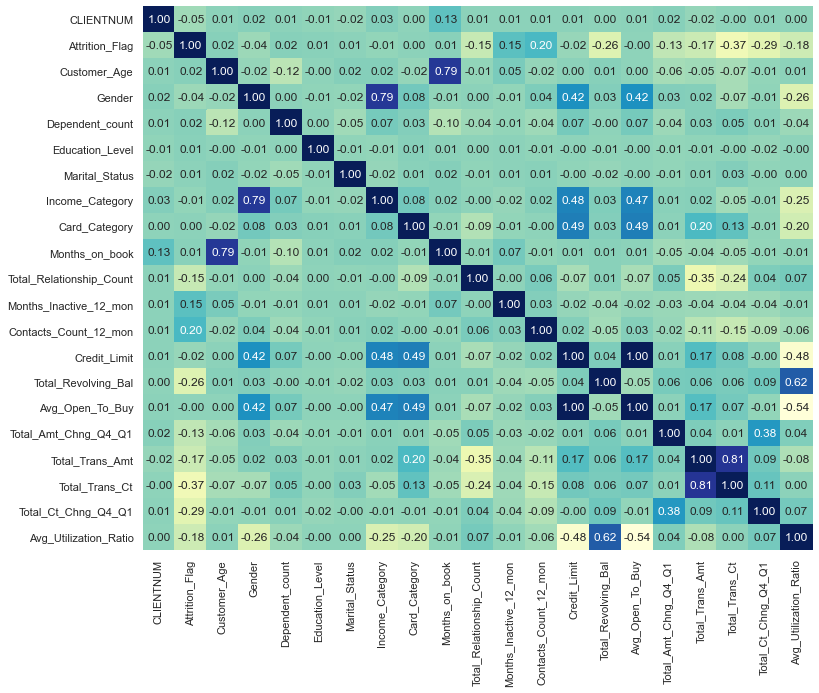

In [74]:
plt.figure(figsize=(12, 10))
sns.heatmap(bank_data.corr(), annot=True, fmt='.2f', cmap="YlGnBu", cbar=False)

In [80]:
print(bank_data[['Credit_Limit', 'Avg_Open_To_Buy']].head())

print(len(bank_data[bank_data['Credit_Limit'] == bank_data['Avg_Open_To_Buy']]) / len(bank_data))
print(len(bank_data[bank_data['Credit_Limit'] >= bank_data['Avg_Open_To_Buy']]) / len(bank_data))
print(len(bank_data[bank_data['Credit_Limit'] - bank_data['Avg_Open_To_Buy'] == bank_data['Total_Revolving_Bal']]) / len(bank_data))

# so 'Credit_Limit' = 'Avg_Open_To_Buy' + 'Total_Revolving_Bal'

   Credit_Limit  Avg_Open_To_Buy
0       12691.0          11914.0
1        8256.0           7392.0
2        3418.0           3418.0
3        3313.0            796.0
4        4716.0           4716.0
0.24390243902439024
1.0
1.0


In [95]:
# predict
# first, we find the most important features
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score, classification_report


X = bank_data.drop(columns=['Attrition_Flag'], axis=1)
y = bank_data['Attrition_Flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=bank_data['Attrition_Flag'])
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print('\nAUC Score:', roc_auc_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)


AUC Score: 0.8896950426362192
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      2125
           1       0.93      0.79      0.85       407

    accuracy                           0.96      2532
   macro avg       0.94      0.89      0.91      2532
weighted avg       0.96      0.96      0.96      2532



array([[2100,   25],
       [  85,  322]], dtype=int64)

In [89]:
# feature importance
# print(list(zip(X_train.columns, rfc.feature_importances_)))
list(zip(X_train.columns, rfc.feature_importances_))

[('CLIENTNUM', 0.02622198121197463),
 ('Customer_Age', 0.03054116009249397),
 ('Gender', 0.008242371841599021),
 ('Dependent_count', 0.010636816944709583),
 ('Education_Level', 0.010814694919310088),
 ('Marital_Status', 0.00807758222444255),
 ('Income_Category', 0.010492987686357686),
 ('Card_Category', 0.0029661519234770394),
 ('Months_on_book', 0.02271650124294681),
 ('Total_Relationship_Count', 0.06642066374927763),
 ('Months_Inactive_12_mon', 0.025165192377776945),
 ('Contacts_Count_12_mon', 0.026777923456865506),
 ('Credit_Limit', 0.03413130931351719),
 ('Total_Revolving_Bal', 0.09507898452401083),
 ('Avg_Open_To_Buy', 0.0287492286967412),
 ('Total_Amt_Chng_Q4_Q1', 0.060633683057712114),
 ('Total_Trans_Amt', 0.18622791408756212),
 ('Total_Trans_Ct', 0.17383959275565494),
 ('Total_Ct_Chng_Q4_Q1', 0.10311177100814664),
 ('Avg_Utilization_Ratio', 0.06915348888542354)]